# 2D plate capacitor example

In [1]:
import numpy as np
from ngsolve.webgui import Draw

from pinnfem import (
    Circ,
    Rect,
    exclude_points_in_region,
    get_vals_of_points,
    plot_geo,
    plot_test_points,
    solve,
    wrap_to_mesh,
)

/home/jacob/Schreibtisch/Uni/Forschung/PINNs-EIT/pinnfem/visualization.py:61: SyntaxWarning: invalid escape sequence '\p'
  plt.colorbar(label="Potential $\phi(x, y)$")


Got a list of 4 geometries.


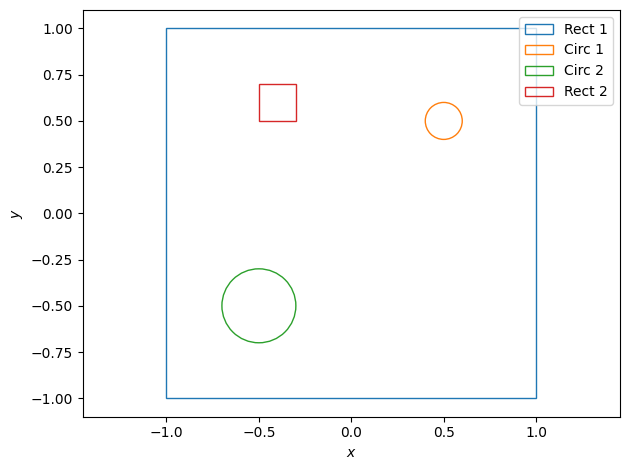

In [2]:
solve_BC = {
    "bc": "default",
    "mat": "air",
    "mat_perm": 1,
    "pot_val": 0,
}
Ω = Rect(-1, -1, 2, 2, BC=solve_BC)

solve_BC = {"bc": "bc_plate1", "mat": "el_mat", "mat_perm": 5.0, "pot_val": 10}
plate1 = Circ(0.5, 0.5, 0.1, BC=solve_BC)

solve_BC = {"bc": "bc_plate2", "mat": "el_mat", "mat_perm": 5.0, "pot_val": -10}
plate2 = Circ(-0.5, -0.5, 0.2, BC=solve_BC)

solve_BC = {"bc": "bc_plate3", "mat": "el_mat", "mat_perm": 2.0, "pot_val": 15}
plate3 = Rect(-0.5, 0.5, 0.2, 0.2, BC=solve_BC)

plot_geo([Ω, plate1, plate2, plate3])

In [3]:
refinement = 0.05
mesh = wrap_to_mesh(Ω, [plate1, plate2, plate3], refinement)

In [4]:
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [5]:
# solve and get grid function
gfu = solve(Ω, [plate1, plate2, plate3], refinement)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [6]:
Draw(gfu)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [10]:
X, Y, Pts = Ω.generate_grid()
Pts = exclude_points_in_region(Pts, [plate1, plate2, plate3])

xs, ys, vals = get_vals_of_points(mesh, gfu, Pts)

Got a list of 3 geometries to exclude.


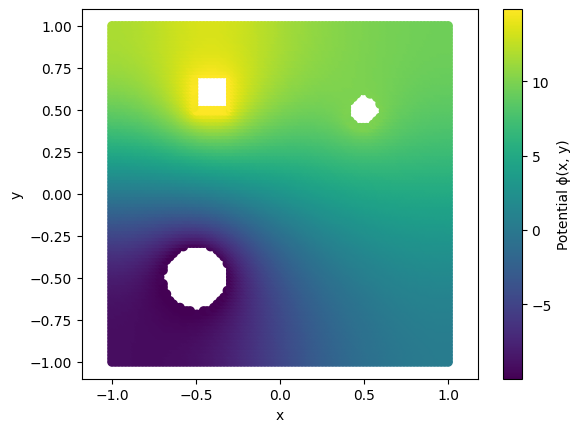

In [11]:
plot_test_points(xs, ys, vals)

# 3D plate capacitor example